ESC +shift +l turns on/off numberlines

# Visualization with plotnine

In [1]:
import pandas as pd
import numpy as np
import plotnine
from plotnine import *
%matplotlib inline

In [2]:
url = 'http://dx.doi.org/10.1787/888932937035'
pisa = pd.read_excel(url,
                     skiprows=18,      # skip the first 18 rows
                     skipfooter=7,     # skip the last 7
                     usecols=[0,1,9,13], # select columns of interest
                     index_col=0,      # set the index as the first column
                     header=0      # set the variable names
                     )

In [3]:
pisa

,Mathematics,Reading,Science
NaN,Mean score in PISA 2012,Mean score in PISA 2012,Mean score in PISA 2012
NaN,NaN,NaN,NaN
OECD average,494.046447,496.462864,501.159793
NaN,NaN,NaN,NaN
Shanghai-China,612.675536,569.588408,580.117831
...,...,...,...
Jordan,385.595556,399.034747,409.367215
Colombia,376.488601,403.402534,398.678632
Qatar,376.448399,387.504131,383.642553
Indonesia,375.114452,396.120095,381.911485


In [4]:
pisa = pisa.dropna().iloc[1:,:]

In [5]:
pisa

,Mathematics,Reading,Science
OECD average,494.046447,496.462864,501.159793
Shanghai-China,612.675536,569.588408,580.117831
Singapore,573.468314,542.215834,551.493157
Hong Kong-China,561.241096,544.600086,554.937434
Chinese Taipei,559.824796,523.118904,523.314904
...,...,...,...
Jordan,385.595556,399.034747,409.367215
Colombia,376.488601,403.402534,398.678632
Qatar,376.448399,387.504131,383.642553
Indonesia,375.114452,396.120095,381.911485


In [6]:
pisa.columns = ['math', 'reading', 'science'] # simplify variable names

In [7]:
#Let's just make sure things are okay
pisa = pisa.astype(float)

In [8]:
pisa

,math,reading,science
OECD average,494.046447,496.462864,501.159793
Shanghai-China,612.675536,569.588408,580.117831
Singapore,573.468314,542.215834,551.493157
Hong Kong-China,561.241096,544.600086,554.937434
Chinese Taipei,559.824796,523.118904,523.314904
...,...,...,...
Jordan,385.595556,399.034747,409.367215
Colombia,376.488601,403.402534,398.678632
Qatar,376.448399,387.504131,383.642553
Indonesia,375.114452,396.120095,381.911485


In [9]:
pisa=pisa.rename_axis('Region').reset_index()


In [10]:
pisa

,Region,math,reading,science
0,OECD average,494.046447,496.462864,501.159793
1,Shanghai-China,612.675536,569.588408,580.117831
2,Singapore,573.468314,542.215834,551.493157
3,Hong Kong-China,561.241096,544.600086,554.937434
4,Chinese Taipei,559.824796,523.118904,523.314904
...,...,...,...,...
61,Jordan,385.595556,399.034747,409.367215
62,Colombia,376.488601,403.402534,398.678632
63,Qatar,376.448399,387.504131,383.642553
64,Indonesia,375.114452,396.120095,381.911485


In [11]:
pisa.describe()

,math,reading,science
count,66.000000,66.000000,66.000000
mean,473.645236,474.320571,478.965884
std,55.088067,46.799594,50.442523
min,368.102547,384.151223,373.113448
25%,432.350598,440.715842,440.076026
50%,484.820239,487.782365,493.921917
75%,509.888841,509.017501,519.337236
max,612.675536,569.588408,580.117831


## Getting started! Layers!

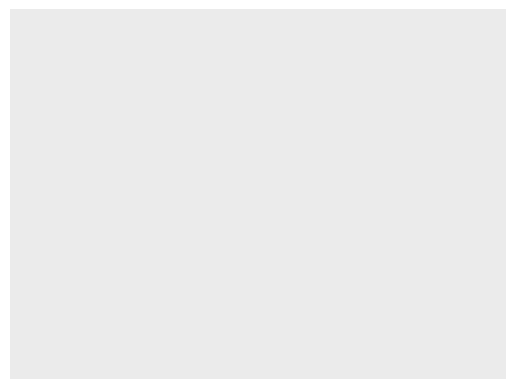

<ggplot: (8784718206067)>

In [13]:
## plotnine needs a dataframe to start

(ggplot(data=pisa))


Well, nothing showed up! What is going on?! We need to add aesthetics!

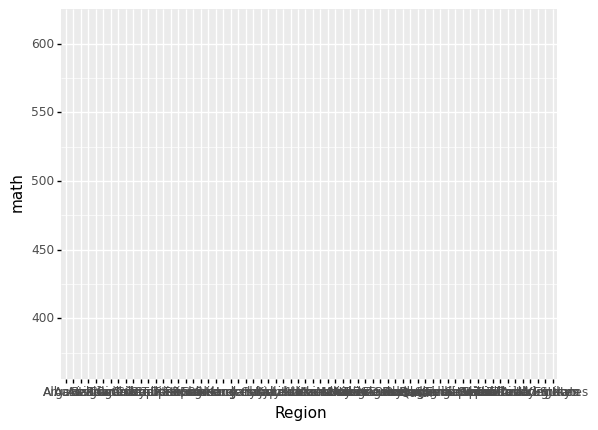

<ggplot: (8784730472150)>

In [14]:
(ggplot(data=pisa, mapping=aes(x='Region', y='math')))


We are getting somewhere!, for now we have defined a space where the graph is going to live. We use layers called geoms to actually feed a plot, we can add new layers by adding a plus to the latest part of the command.

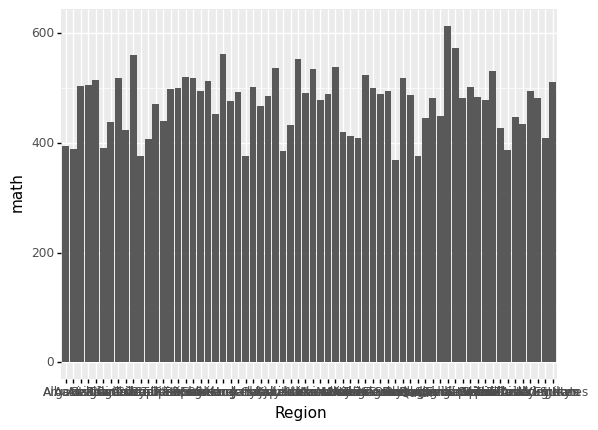

<ggplot: (8784785826018)>

In [15]:
(ggplot(data=pisa, mapping=aes(x='Region', y='math'))+
geom_bar(stat='identity'))


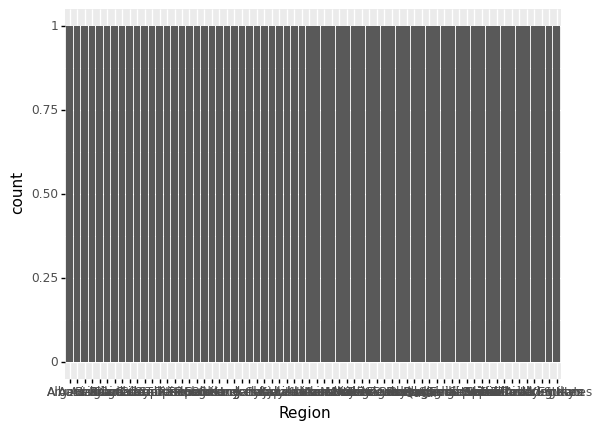

<ggplot: (8784730350475)>

In [16]:
(ggplot(data=pisa, mapping=aes(x='Region'))+
geom_bar())

Great! I can see a bar plot now, but this doesn't look like anything on the x axis, maybe I would like a horizontal bar plot

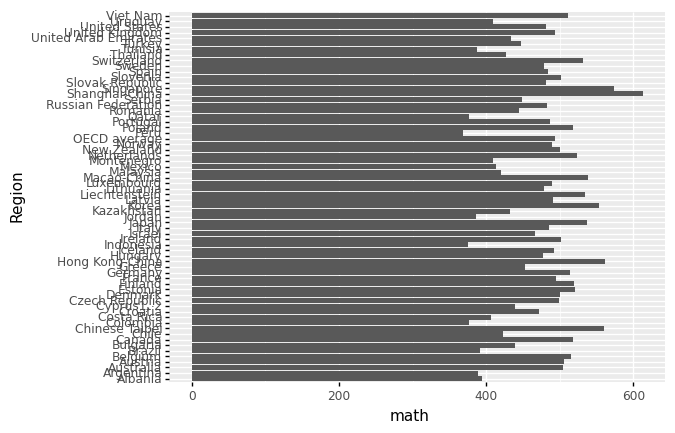

<ggplot: (8784730354815)>

In [17]:
(ggplot(data=pisa, mapping=aes(x='Region', y='math'))+
geom_bar(stat='identity')+
coord_flip())


Okay, I hate how this looks, let me make these plots larger, we are going to set the following option (in inches) from now on:

In [18]:
plotnine.options.figure_size = (16, 8)

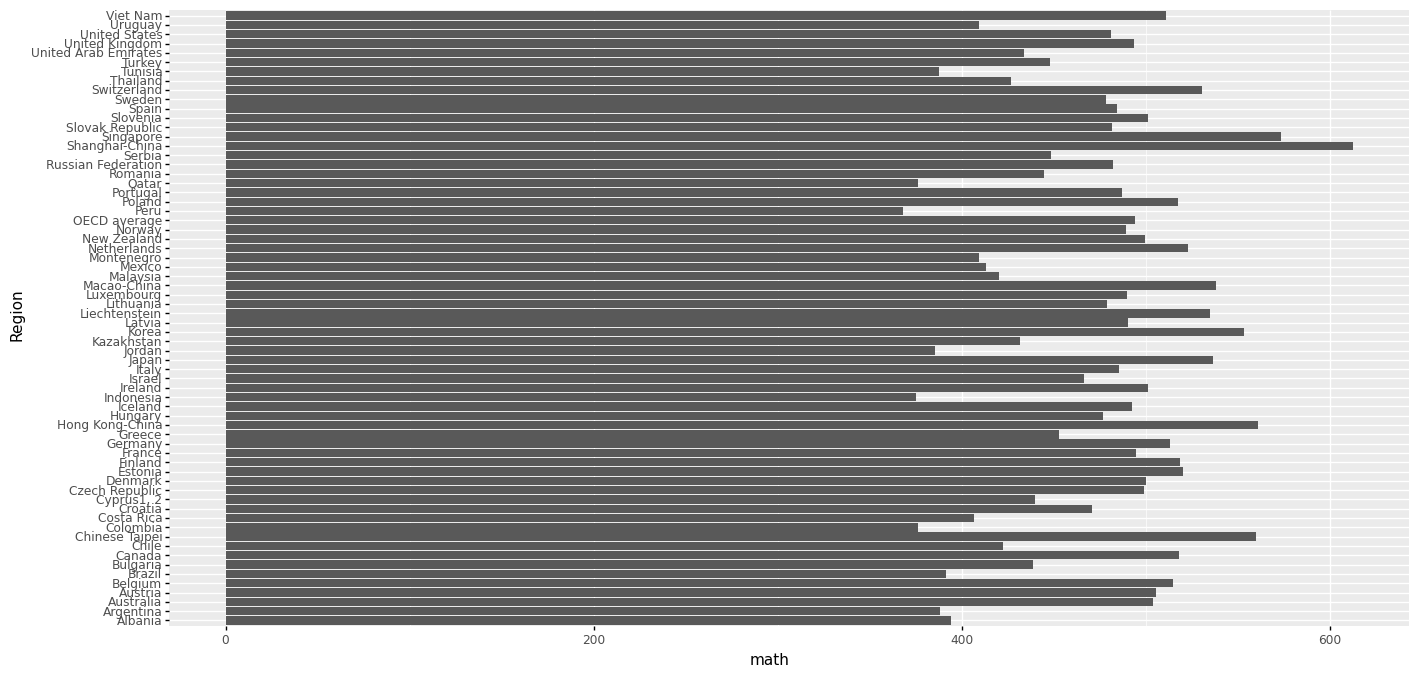

<ggplot: (8784684813099)>

In [19]:
(ggplot(data=pisa, mapping=aes(x='Region', y='math'))+
geom_bar(stat='identity')+
coord_flip())

OK, this is better, but maybe we could just look at only the first 5 countries like this and make the bars dark orange

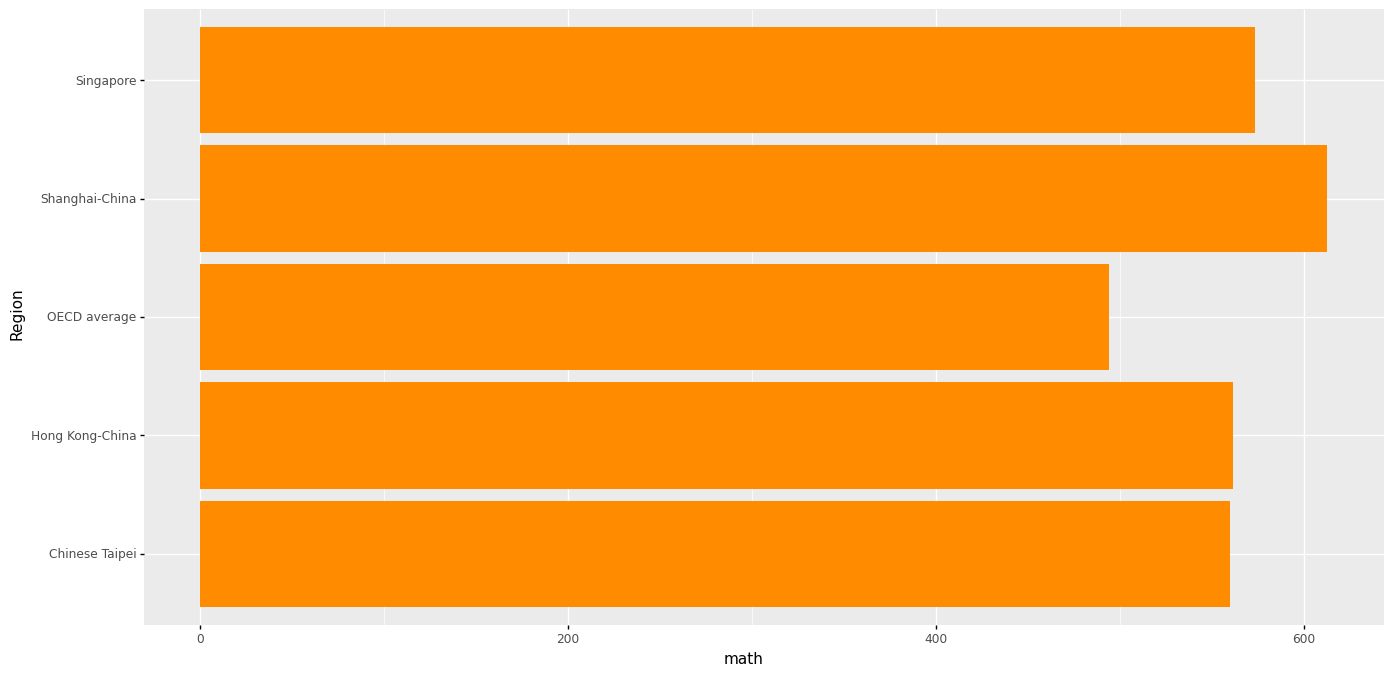

<ggplot: (8784718845901)>

In [20]:
(ggplot(data=pisa.iloc[0:5,], mapping=aes(x='Region', y='math'))+
geom_bar(stat='identity', fill='darkorange')+
coord_flip())

I'd like to do more work with this, and change the axis labels and give the plot a nice title

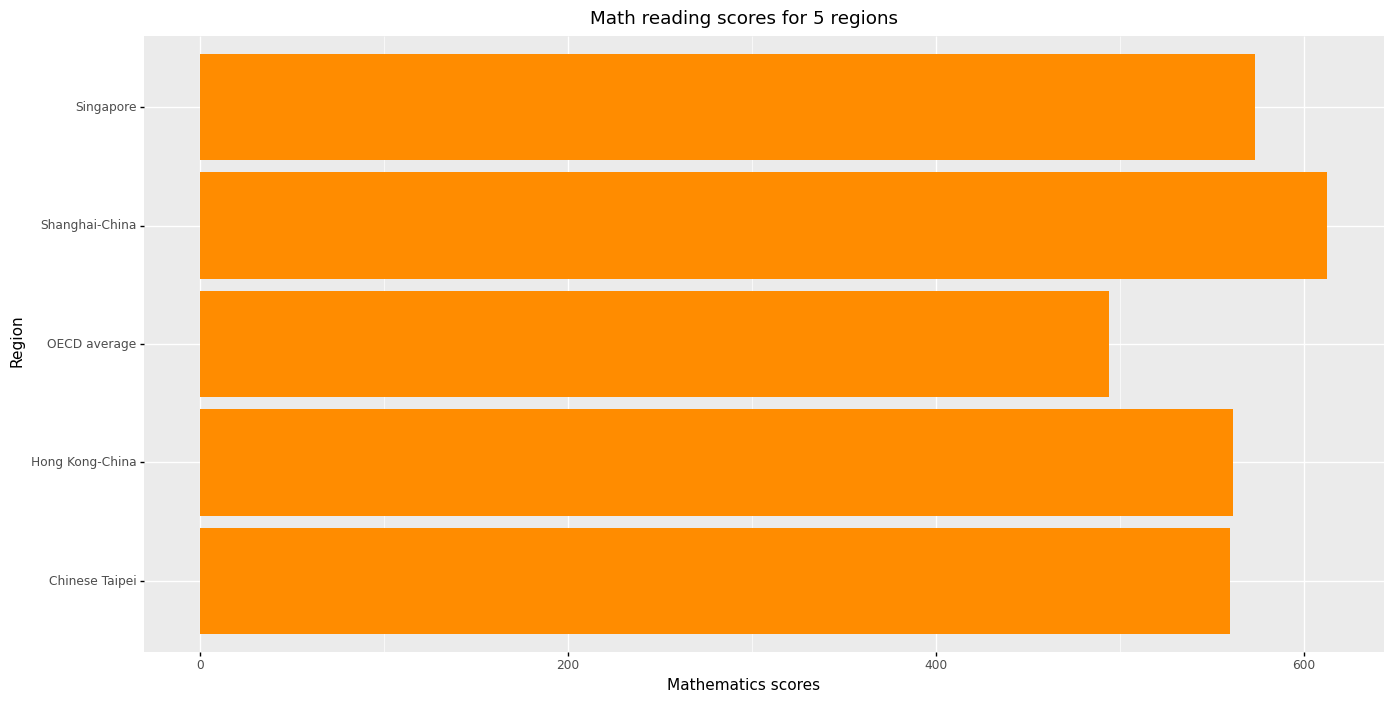

<ggplot: (8784730638333)>

In [21]:
(ggplot(data=pisa.iloc[0:5,], mapping=aes(x='Region', y='math'))+
geom_bar(stat='identity', fill='darkorange')+
xlab("Region")+
ylab("Mathematics scores")+
ggtitle("Math reading scores for 5 regions")+ 
coord_flip())


Gray rectangles are pretty ugly. Let's get rid of them:

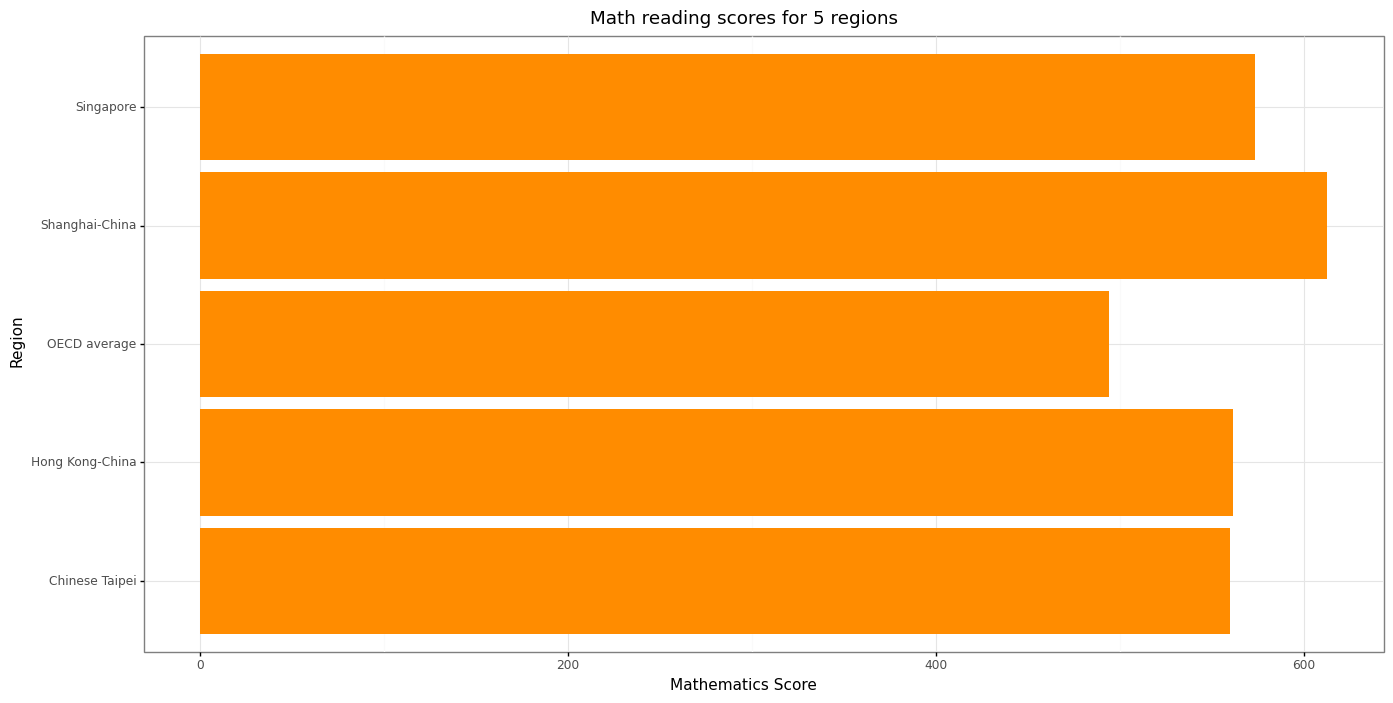

<ggplot: (8784730636349)>

In [22]:
(ggplot(data=pisa.iloc[0:5,], mapping=aes(x='Region', y='math'))+
geom_bar(stat='identity', fill='darkorange')+
xlab("Region")+
ylab("Mathematics Score")+
ggtitle("Math reading scores for 5 regions")+ 
coord_flip()+
theme_bw())

Maybe I would like to know if the scores of math and reading follow each other

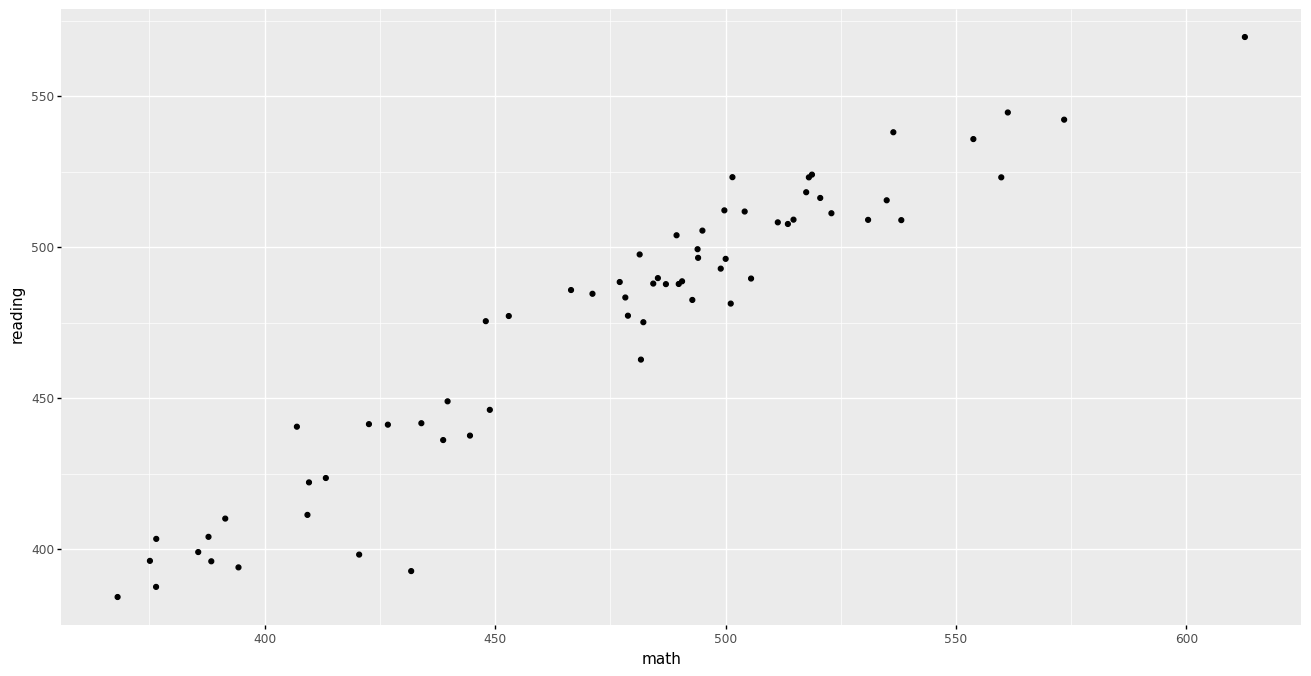

<ggplot: (8784730969378)>

In [23]:
(ggplot(data=pisa, mapping=aes(x='math', y='reading'))+
 geom_point())

Let's get a trend line as close as possible to the dots and make the background not gray squares

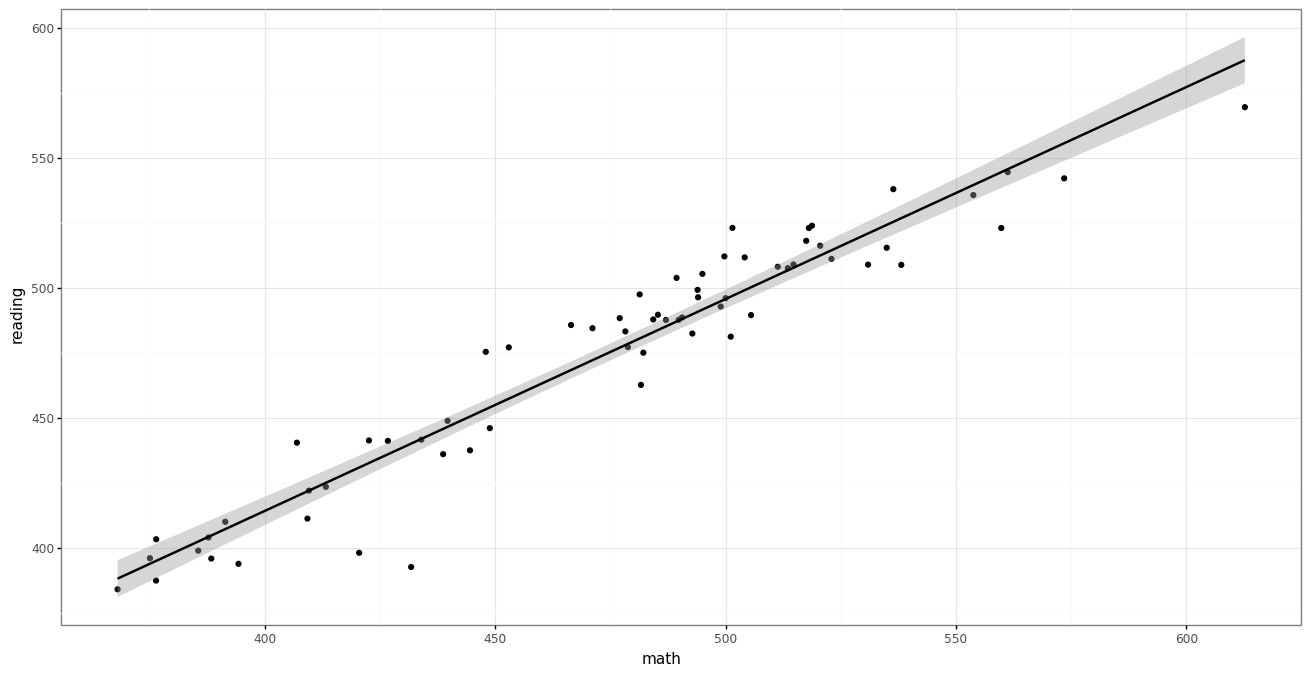

<ggplot: (8784718540005)>

In [24]:
(ggplot(data=pisa, mapping=aes(x='math', y='reading'))+
 geom_point()+
geom_smooth(method='lm')+
theme_bw())

/Users/pablocrespo/opt/anaconda3/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


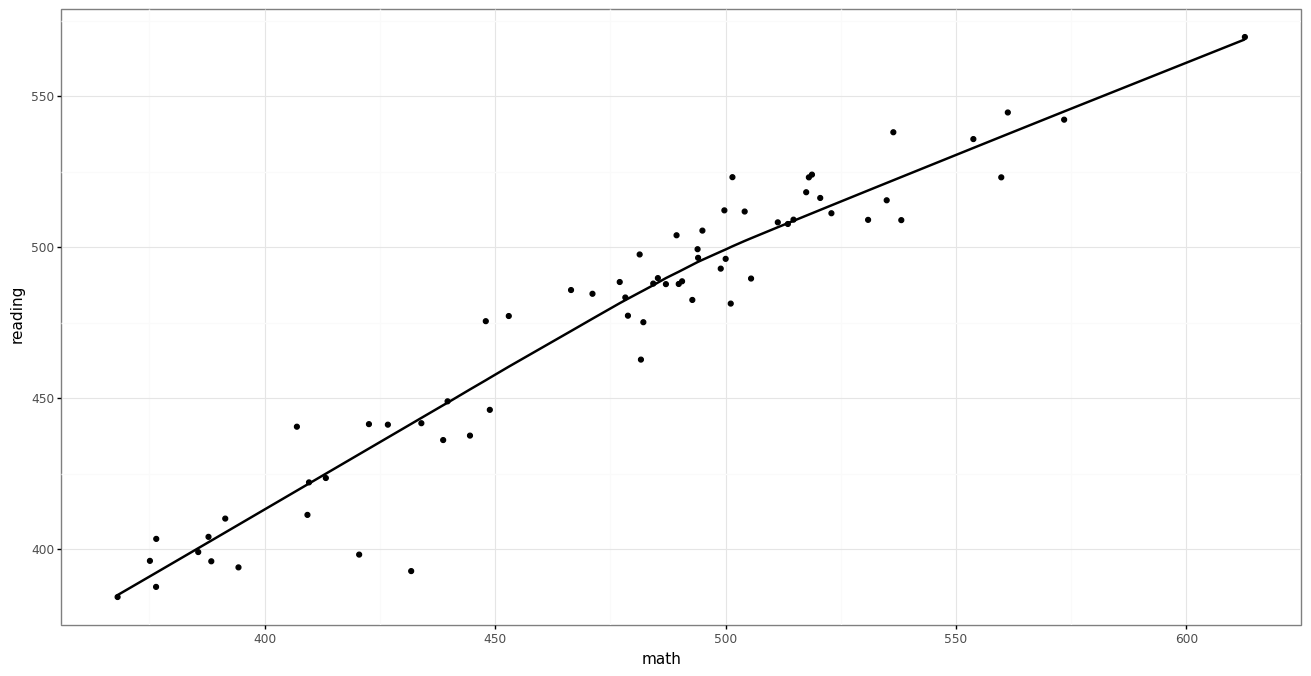

<ggplot: (8784718371121)>

In [25]:
(ggplot(data=pisa, mapping=aes(x='math', y='reading'))+
 geom_point()+
geom_smooth()+
theme_bw())

## Let's play with a new dataset (gapminder)

You might have seen this:

https://www.youtube.com/watch?v=Z8t4k0Q8e8Y

we are gonna try to get just one of those years plotted!

In [26]:
g_url='https://raw.githubusercontent.com/swcarpentry/r-novice-gapminder/gh-pages/_episodes_rmd/data/gapminder-FiveYearData.csv'

gapminder=pd.read_csv(g_url)

In [27]:
gapminder.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


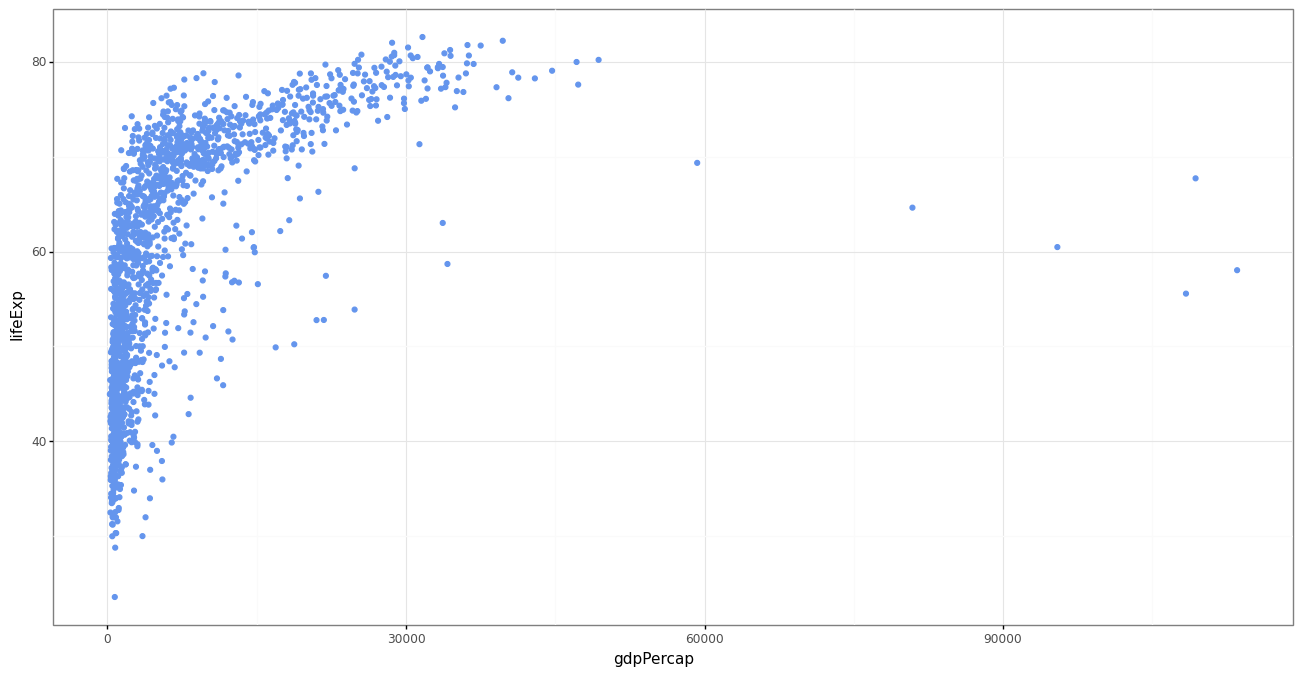

<ggplot: (8784718843004)>

In [28]:
#let's do a scatter plot with where the horizontal axis is gdp per capita and y is life expectancy! 
#Extra, try the color of the dots to be of color 'cornflowerblue'



(ggplot(data=gapminder, mapping=aes(x='gdpPercap', y='lifeExp'))+
 geom_point(color='cornflowerblue')+
 theme_bw()
)
















In [29]:
#let's check out what are the continents in the datadframe


gapminder['continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

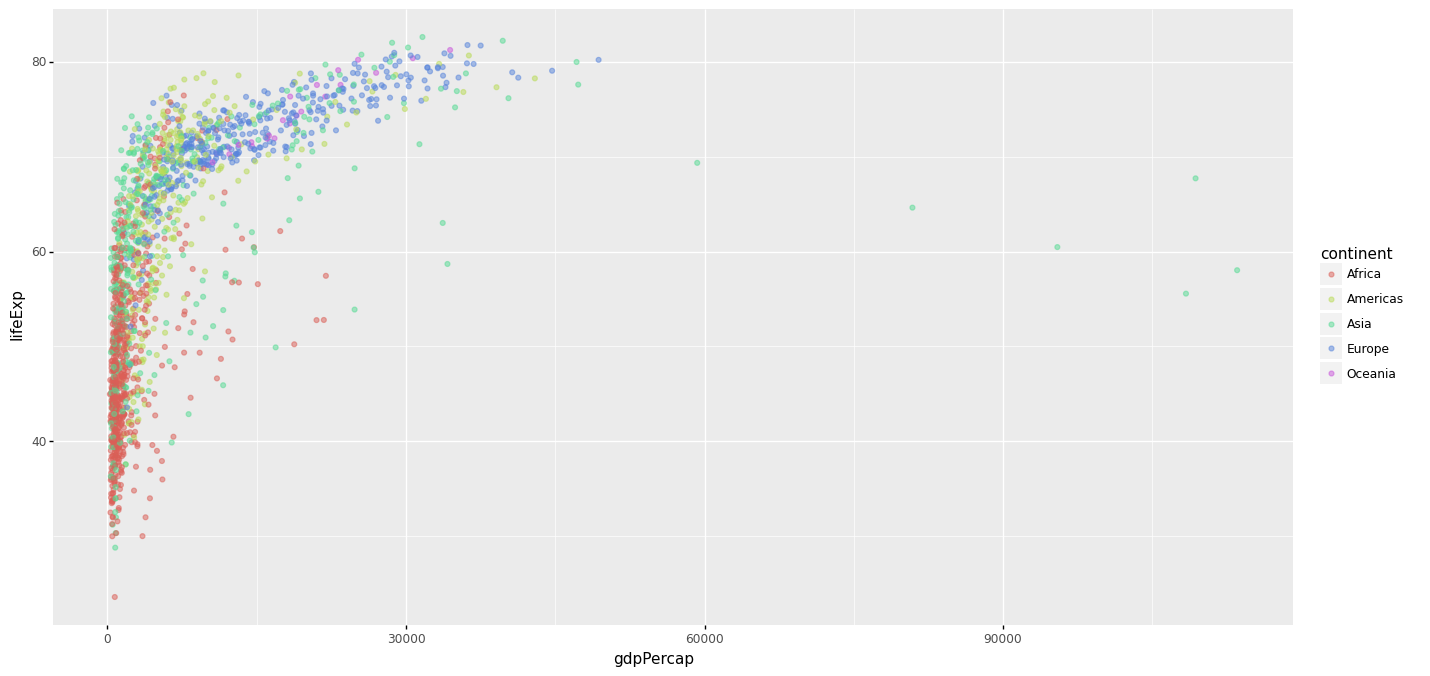

<ggplot: (8784718372208)>

In [30]:
#To get one of those nice plots, I'd like to get each continent under a new color

(ggplot(data=gapminder, mapping=aes(x='gdpPercap', y='lifeExp', color='continent')) +
        geom_point(alpha = 0.5)
)

In [31]:
#Nice!!!!, but I want to get a single year, let's see what years we have available

gapminder['year'].unique()

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007])

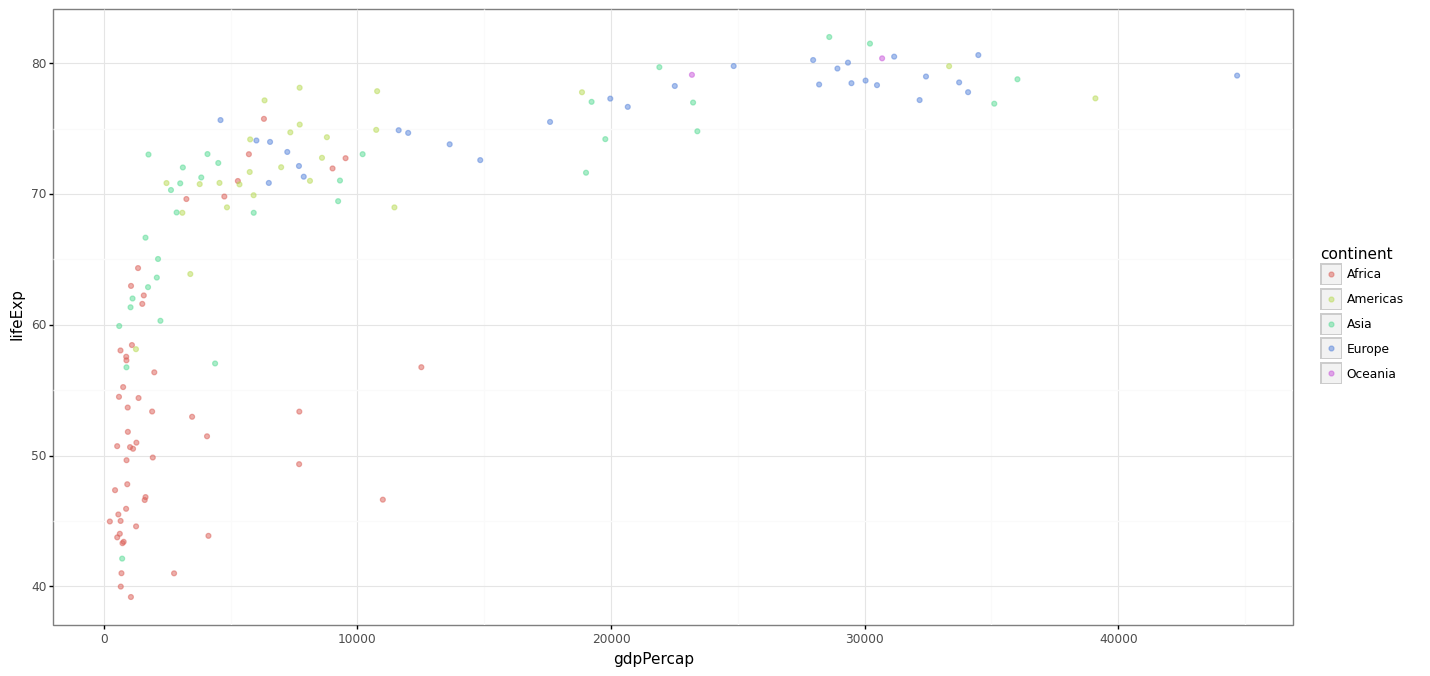

<ggplot: (8784730341753)>

In [32]:
#Let's pick2002 and do the same plot as above!

(ggplot(data=gapminder.loc[gapminder['year']==2002], mapping=aes(x='gdpPercap', y='lifeExp',
                                                                 color='continent')) +
        geom_point(alpha = 0.5)+
 theme_bw()
)


NIIIICE!, Now let's get the size of the countries 

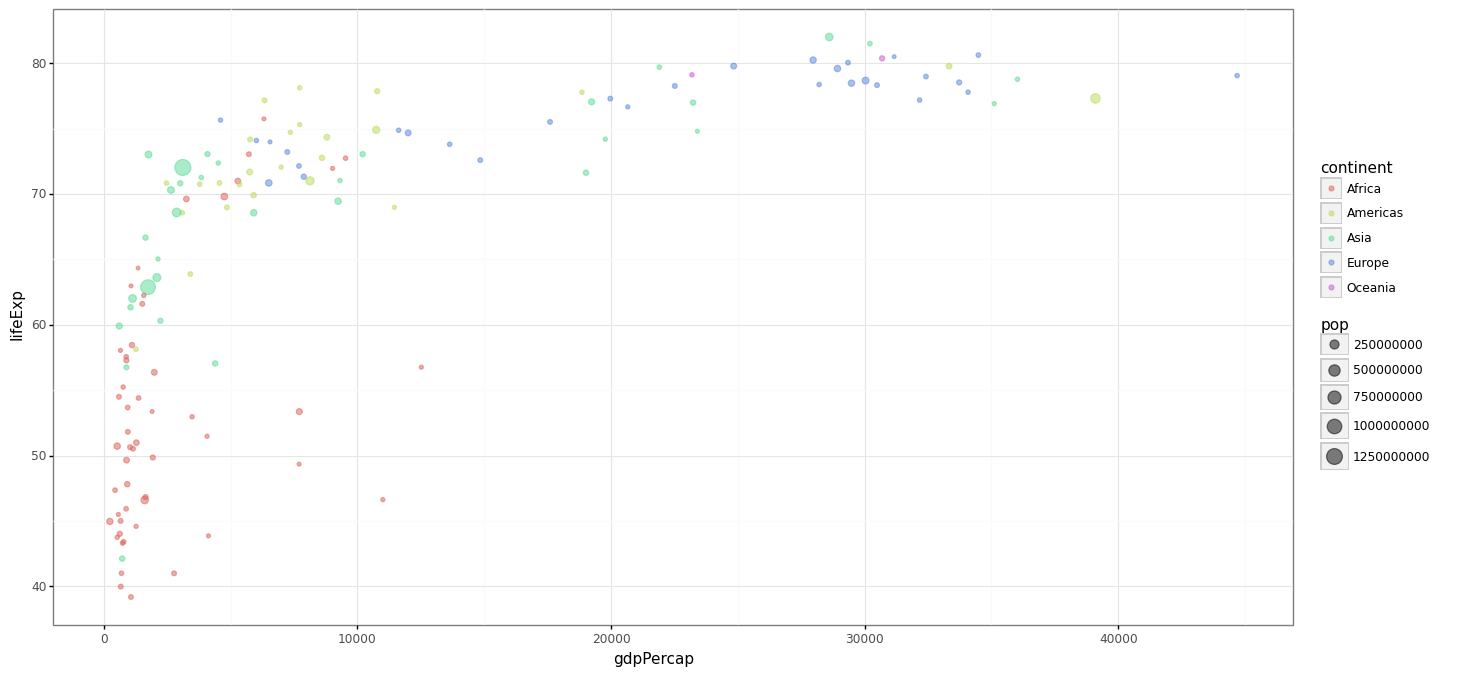

<ggplot: (8784785745716)>

In [33]:

(ggplot(data=gapminder.loc[gapminder['year']==2002], mapping=aes(x='gdpPercap', y='lifeExp',
                                                                 color='continent',size='pop')) +
        geom_point(alpha = 0.5)+
 theme_bw()
)

It's a bit hard to see anything while in the youtube clip we saw everything really well, so what can we do? In the video we have that gdp is in a log10 scale

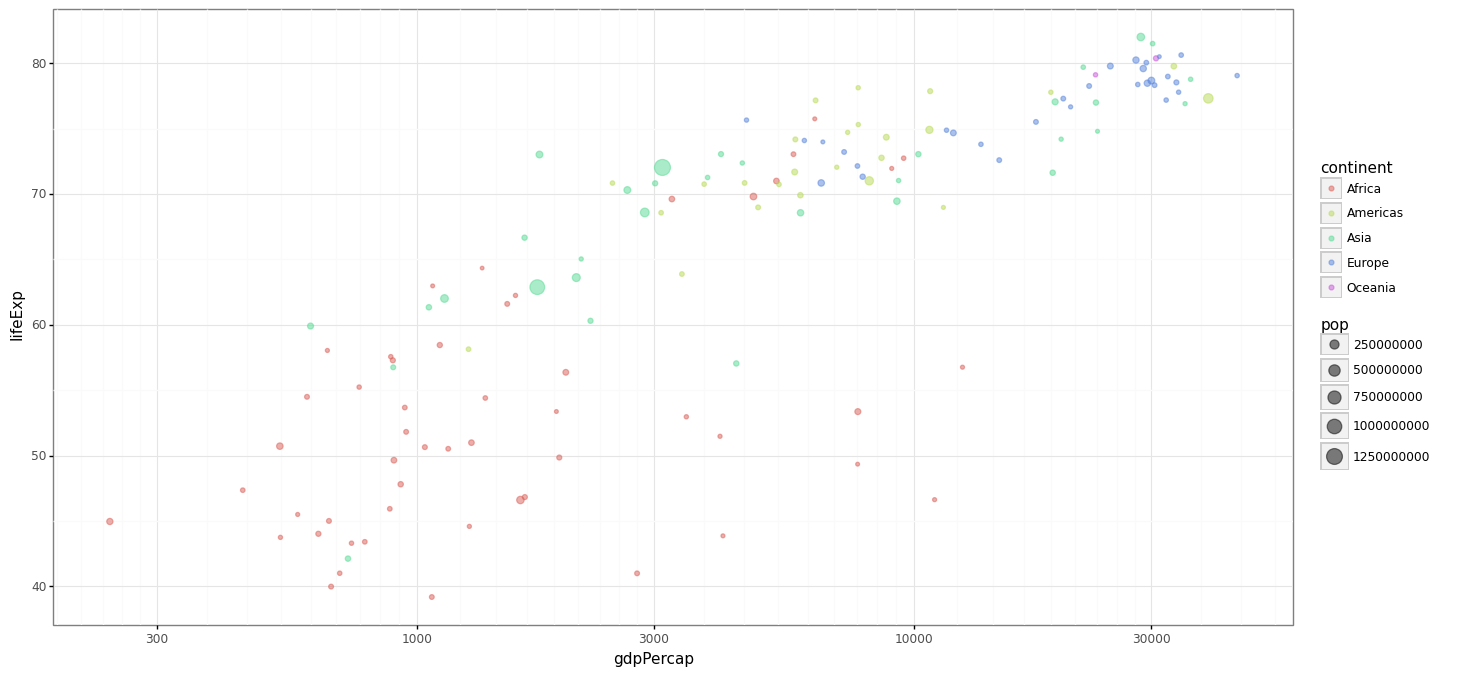

<ggplot: (8784785800629)>

In [34]:
(ggplot(data=gapminder.loc[gapminder['year']==2002], mapping=aes(x='gdpPercap', y='lifeExp',
                                                                 color='continent',size='pop')) +
        geom_point(alpha = 0.5)+
 scale_x_log10()+
 theme_bw()
)

Let's change the plot size a bit to see things better

In [35]:
plotnine.options.figure_size = (9, 4.5)

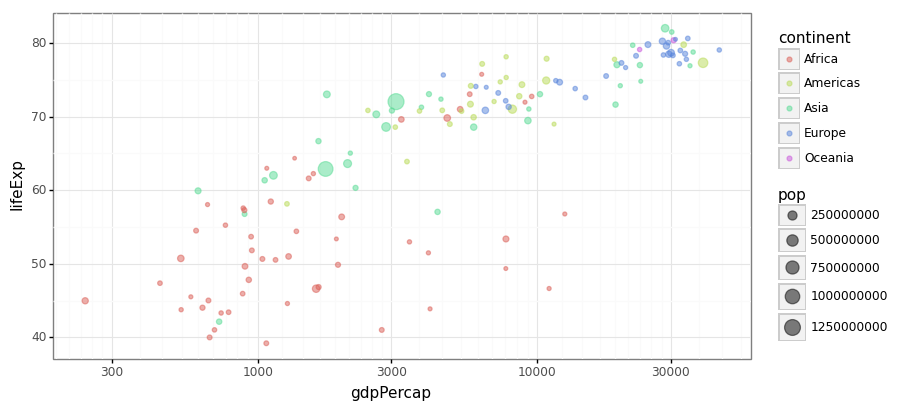

<ggplot: (8784686063779)>

In [36]:
(ggplot(data=gapminder.loc[gapminder['year']==2002], mapping=aes(x='gdpPercap', y='lifeExp',
                                                                 color='continent',size='pop')) +
        geom_point(alpha = 0.5)+
 scale_x_log10()+
 theme_bw()
)

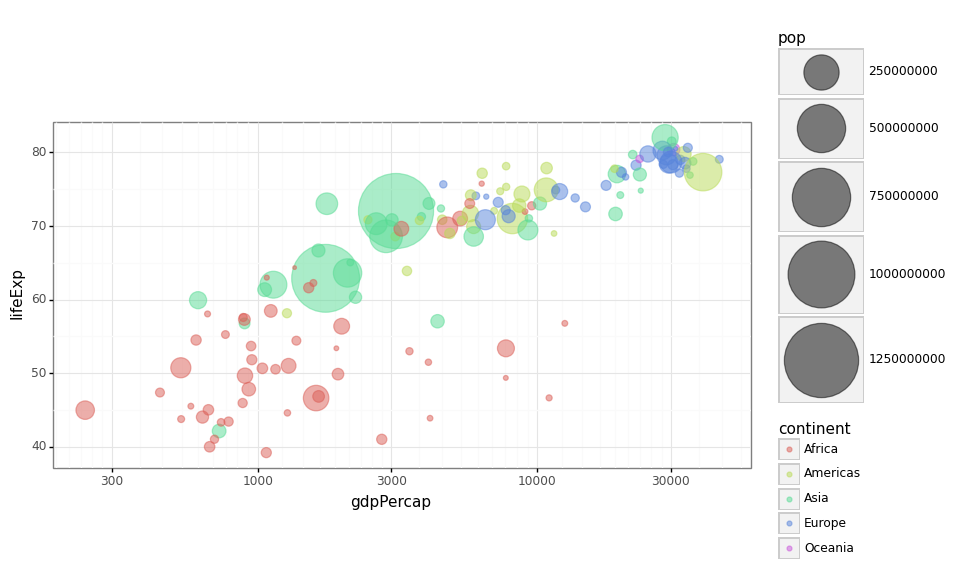

<ggplot: (8784684769473)>

In [37]:
#We can add a layer that will allow us to see this better by making the scale size a bit larger

(ggplot(data=gapminder.loc[gapminder['year']==2002], mapping=aes(x='gdpPercap', y='lifeExp',
                                                                 color='continent',size='pop')) +
        geom_point(alpha = 0.5)+
 scale_x_log10()+
 scale_size(range = [1, 30])+
 theme_bw()
)

Nice!, we are almost there... but before we get there let's do some exploration.

Maybe we can just see howlife expectancy in each country evolved over time 

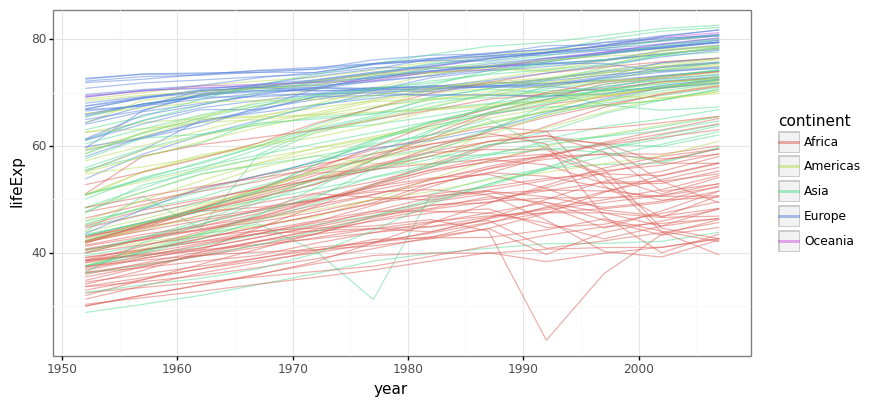

<ggplot: (8784731140130)>

In [38]:
(ggplot(gapminder, aes(x='year', y='lifeExp', group='country', color='continent')) +
        geom_line(alpha = 0.5)+
 theme_bw()
)

This shows me some trends. Then let's go back to our year 2002 and see how the life expectancy looks per continent

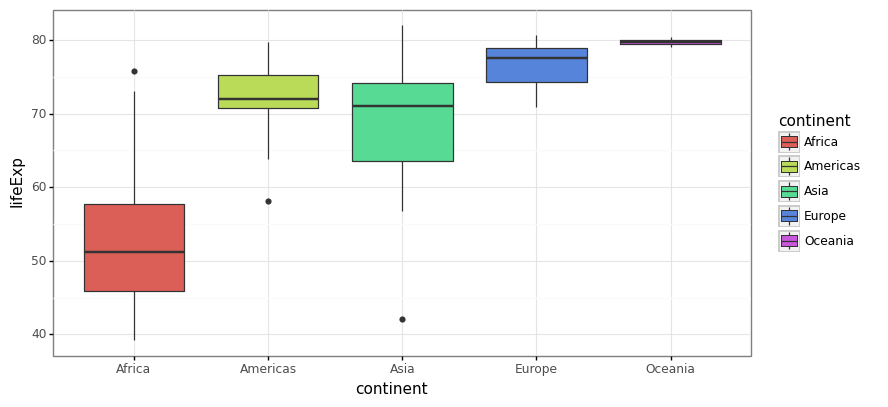

<ggplot: (8784730971841)>

In [39]:
(ggplot(gapminder.loc[gapminder['year']==2002], aes(x='continent', y='lifeExp', fill='continent')) +
        geom_boxplot()+
 theme_bw()
)

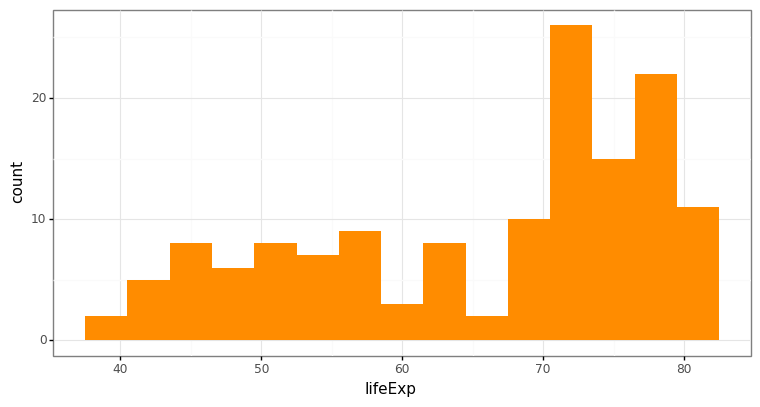

<ggplot: (8784730646553)>

In [40]:
(ggplot(gapminder.loc[gapminder['year']==2002], aes(x='lifeExp')) +
        geom_histogram(binwidth = 3, fill='darkorange')+
 theme_bw()
)

Let's add a density plot on top!

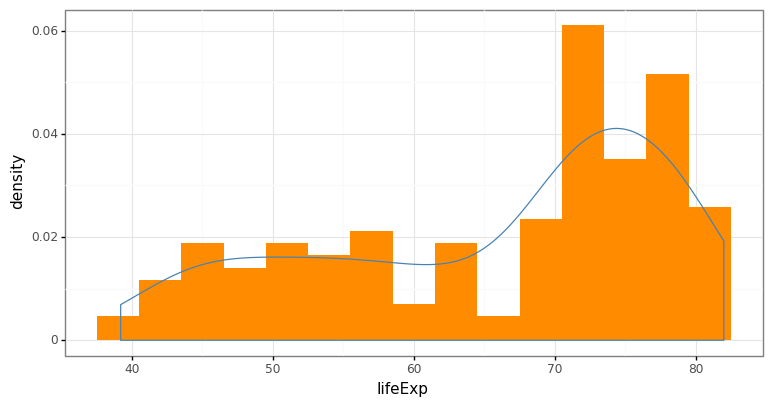

<ggplot: (8784684723990)>

In [41]:
(ggplot(gapminder.loc[gapminder['year']==2002], aes(x='lifeExp')) +
        geom_histogram(aes(y='stat(density)'),binwidth = 3, fill='darkorange')+
     geom_density(color='steelblue')+

 theme_bw()
)

But I want to split this by continent!!! (without density)

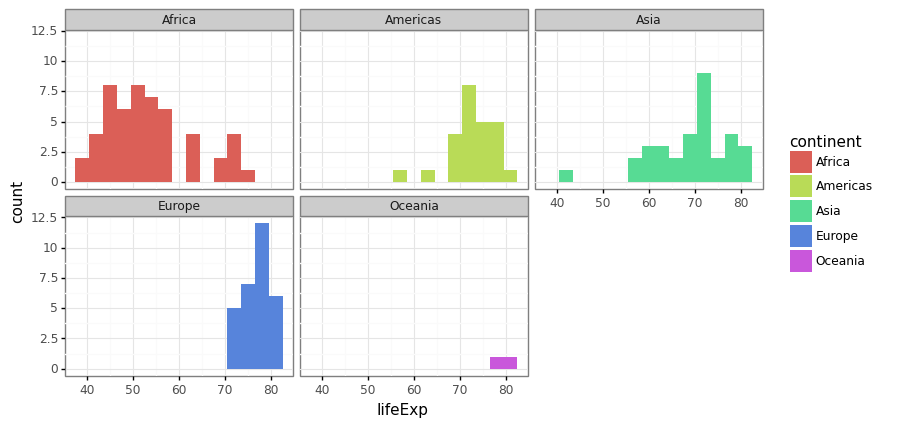

<ggplot: (8784730376804)>

In [42]:
(ggplot(gapminder.loc[gapminder['year']==2002], aes(x='lifeExp', fill='continent')) +
        geom_histogram(binwidth = 3)+
    
 facet_wrap('continent')+

 theme_bw()
)

Do you remember our prettier plot so far?

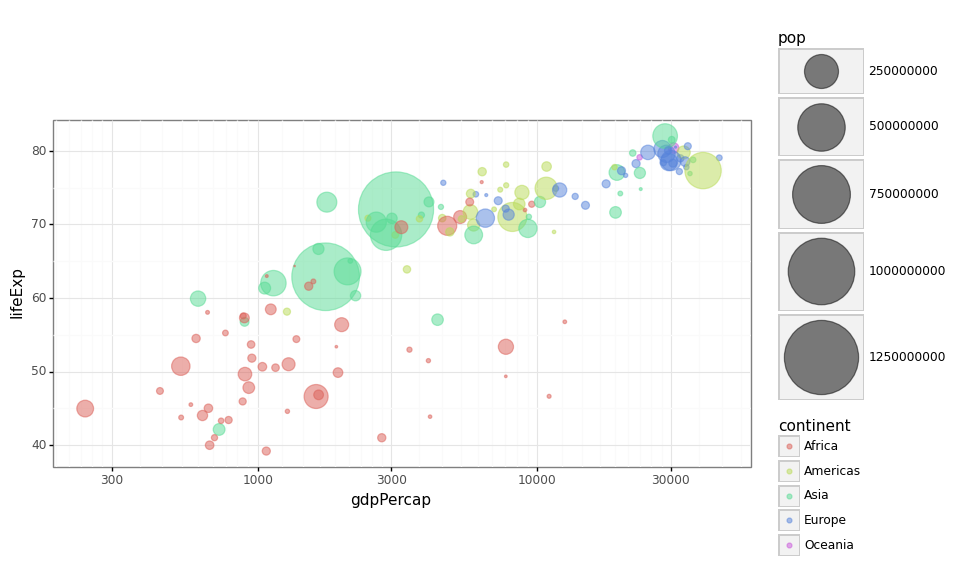

<ggplot: (8784786106911)>

In [46]:
(ggplot(data=gapminder.loc[gapminder['year']==2002], mapping=aes(x='gdpPercap', y='lifeExp',
                                                                 color='continent',size='pop')) +
        geom_point(alpha = 0.5)+
 scale_x_log10()+
 scale_size(range = [0.1, 30])+
 theme_bw()
)

How do I save it?

In [49]:
p=(ggplot(data=gapminder.loc[gapminder['year']==2002], mapping=aes(x='gdpPercap', y='lifeExp',
                                                                 color='continent',size='pop')) +
        geom_point(alpha = 0.5)+
 scale_x_log10()+
 scale_size(range = [0.1, 30])+
 theme_bw()
)

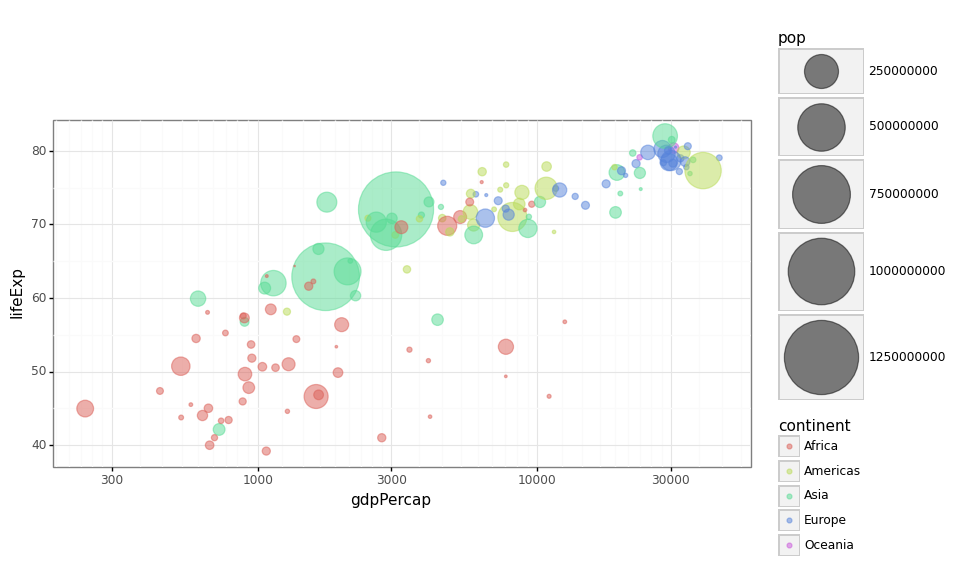

<ggplot: (8784785884191)>

In [50]:
p

Great let's save this

In [51]:
p.save("gapminder2002.png")


/Users/pablocrespo/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 9 x 4.5 in image.
/Users/pablocrespo/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: gapminder2002.png


In [52]:
def gapsaver(year):
    
    if year in gapminder['year'].unique():
    
        p=(ggplot(data=gapminder.loc[gapminder['year']==year], mapping=aes(x='gdpPercap', y='lifeExp',
                                                                     color='continent',size='pop')) +
            geom_point(alpha = 0.5)+
        scale_x_log10()+
        scale_size(range = [0.1, 30])+
        theme_bw()
        )

        savestring='gapminder'+str(year)+'.png'

        p.save(savestring)
    else:
        print("You selected an invalid year")


In [53]:
gapsaver(year=1972)

/Users/pablocrespo/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 9 x 4.5 in image.
/Users/pablocrespo/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: gapminder1972.png


Can we make a function that takes the year and gives us the plot?

In [54]:
def funplot(year):
    
    #If the year taken in is not part of the dataset print a warning statement, otherwise generate the plot

    if year in gapminder['year'].unique().tolist():

        p=(ggplot(data=gapminder.loc[gapminder['year']==year], mapping=aes(x='gdpPercap', y='lifeExp',
                                                                         color='continent',size='pop')) +
                geom_point(alpha = 0.5)+
         scale_x_log10()+
         scale_size(range = [0.1, 30])+
         theme_bw()
        )

        return(p)
    
    else: 
        
        print("Invalid Year")














Let's test our function!

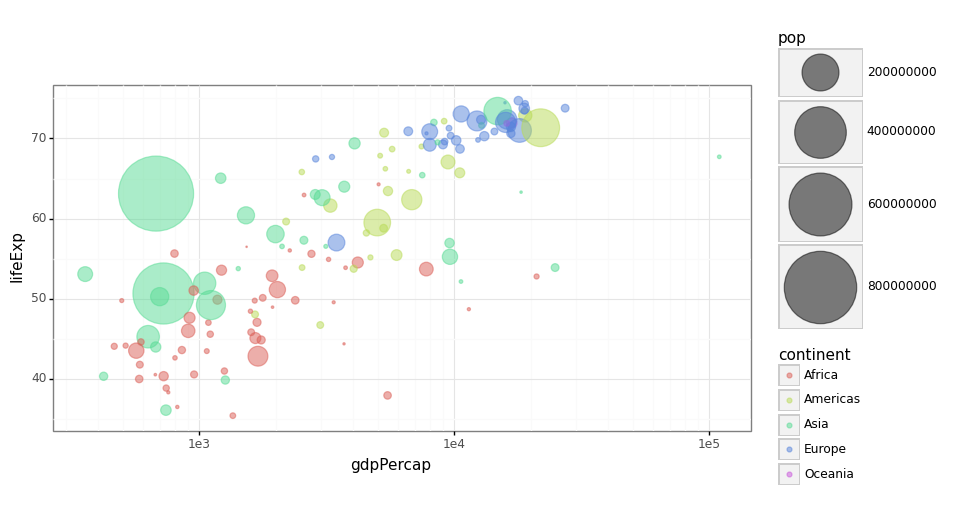

<ggplot: (8784684725899)>

In [55]:
funplot(year=1972)







In [56]:
gapminder['year'].unique().tolist()

[1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007]

Next time let's add labels and then make an animation!